# Exploratory Data Analysis and Model Development

In the first section, we will perform Exploratory Data Analysis, and in the second section we will develop a predictive model for the survival.

## 1. Titanic data set exploratory data analysis

Importing the required packages

In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Reading the training data

Reading the training data and displaying sample records:

In [2]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looks like we have some Null values in some of the columns. Let us display information of all the columns:

In [3]:
#df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Three columns _Age, Cabin_ and _Embarked_ have null values.

In [4]:
cabin_null=pd.isnull(df['Cabin']).sum()/df.shape[0]
age_null=pd.isnull(df['Age']).sum()/df.shape[0]
embarked_null=pd.isnull(df['Embarked']).sum()/df.shape[0]

print("% of nulls in Cabin:{}%".format(round(cabin_null*100,2)))
print("% of nulls in Age:{}%".format(round(age_null*100,2)))
print("% of nulls in Embarkerd:{}%".format(round(embarked_null*100,2)))

% of nulls in Cabin:77.1%
% of nulls in Age:19.87%
% of nulls in Embarkerd:0.22%


The _Cabin_ has lot of Null values. We will try the following three options to tackle this:

1. Convert _Cabin_ values such that the presence of a value is represented by 1, and null as 0
2. Drop the column _Cabin_

For _Age_ and _Embarked_ we will have the following options:

1. Replace the nulls with median value
2. Replace the nulls with mean value
3. Replace the nulls with most frequent value


Before we perform any data transformations, let us perform some exploratory data analysis

In [6]:
import seaborn as sns

### Is there any relationship between Gender, Passenger class and Survival rate?

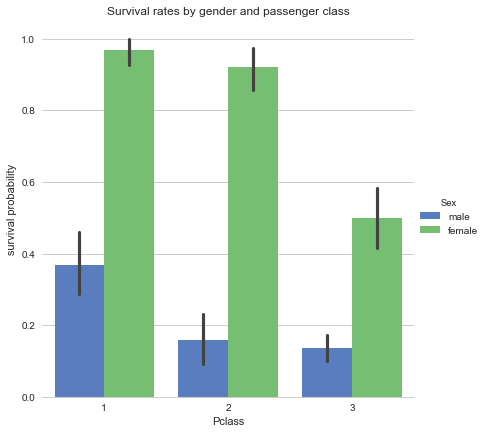

In [7]:
sns.set(style="whitegrid")
g = sns.factorplot(x="Pclass",y="Survived", hue="Sex", data=df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")
plt.title("Survival rates by gender and passenger class")
plt.show()


The above plot we can infer the following:
* The plot clearly shows that the survival rate is very low for male passengers while the survival rate is very high for female passengers. 
* The class 1 passengers have more survival chances than class 2, while class 3 has the least survival chances. 
* The survival chance of femal passenger is atleast 50%, irrespective of the passenger class, while the survival chance of male passengers is less than 0.4, irrespective of the passenger class. 
* Based on the above plot we can confirm that the Sex, Pclass variables are important to determine the survival chance of a passenger.

### Gender, Age, Survival analysis

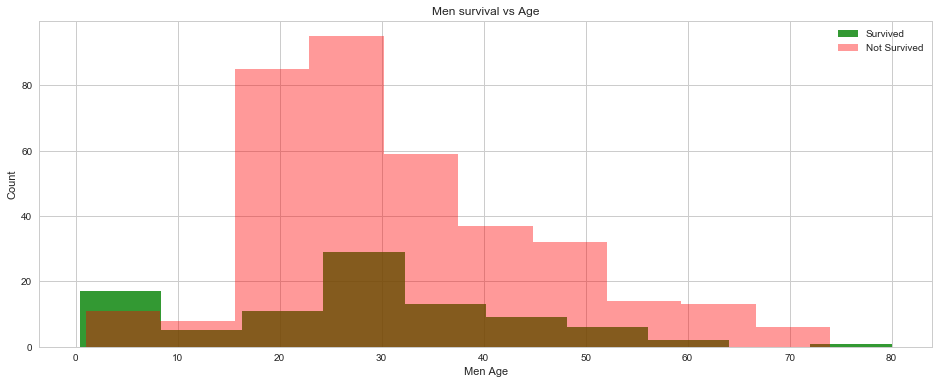

In [8]:
plt.figure(figsize=(16,6))
plt.hist(df[(df['Sex']=='male') & (df['Survived']==1)]['Age'].dropna(),bins=10,alpha=0.8,color='g',label="Survived")
plt.hist(df[(df['Sex']=='male') & (df['Survived'] == 0)]['Age'].dropna(),bins=10,alpha=0.4,color='r',label="Not Survived")
plt.legend()
plt.xlabel("Men Age")
plt.ylabel("Count")
plt.title("Men survival vs Age")
plt.show()

Clearly, the survival rate of men is very low, only men of age below 10 years have a better survival chance. Between 65-72 years age, the survival chance is none.

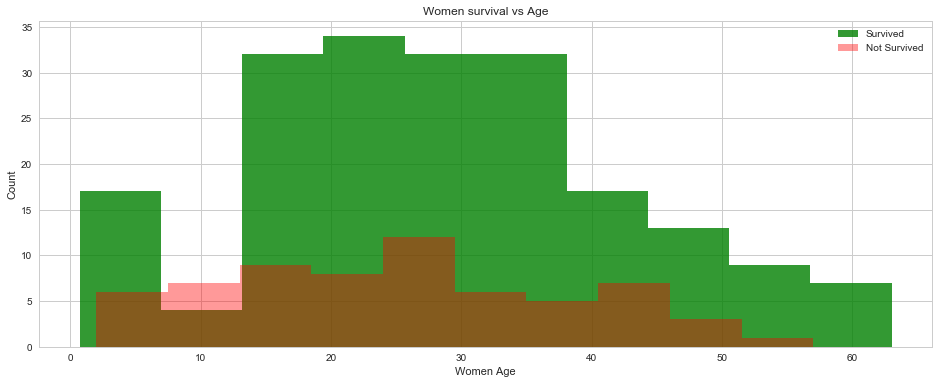

In [9]:
plt.figure(figsize=(16,6))
plt.hist(df[(df['Sex']=='female') & (df['Survived']==1)]['Age'].dropna(),bins=10,alpha=0.8,color='g',label="Survived")
plt.hist(df[(df['Sex']=='female') & (df['Survived'] == 0)]['Age'].dropna(),bins=10,alpha=0.4,color='r',label="Not Survived")
plt.legend()
plt.xlabel("Women Age")
plt.ylabel("Count")
plt.title("Women survival vs Age")
plt.show()

The women survival chance is very high. Except for the age 7 - 13 years, all other age groups have better survival rate. Women above 55 years age (approximately) has almost 100% survival chance.

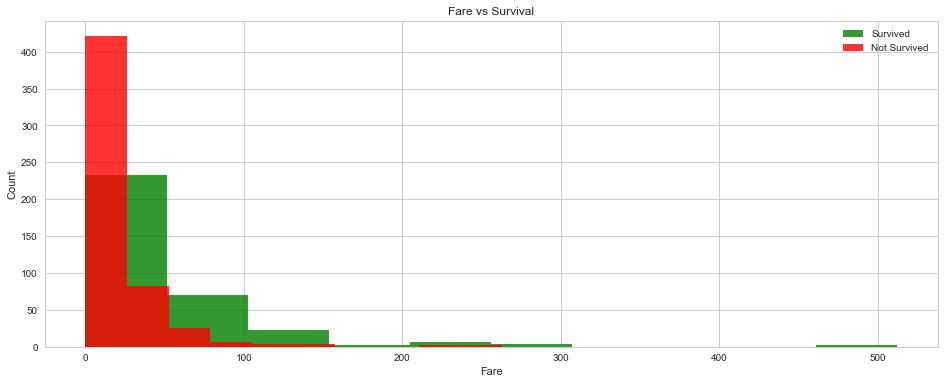

In [10]:
plt.figure(figsize=(16,6))
plt.hist(df[(df['Survived']==1)]['Fare'].dropna(),bins=10,alpha=0.8,color='g',label="Survived")
plt.hist(df[(df['Survived']==0)]['Fare'].dropna(),bins=10,alpha=0.8,color='r',label="Not Survived")
plt.legend()
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Fare vs Survival")
plt.show()

Passengers with a fare of above Pounds 25 have better survival chances than the passengers travelling with a ticket price of below pounds 25.

From the above plots we can confirm that the gender, and age are important variables to determine the survival chances.

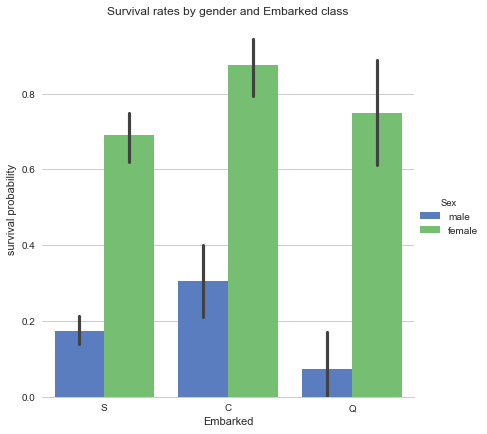

In [11]:
sns.set(style="whitegrid")
g = sns.factorplot(x="Embarked",y="Survived", hue="Sex", data=df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")
plt.title("Survival rates by gender and Embarked class")
plt.show()


Irrespective of the Embarked category, the survival probability of men is always less than 50%, while for women it is at least 60%. 

## 2. Predictive Model

### Base Model

The survival probability is shown below:

In [12]:
survival_summary=df['Survived'].value_counts()
print(survival_summary)
print("pribability of survival: {:2.2f}%".format(100*survival_summary[1]/(survival_summary[0]+survival_summary[1])))

0    549
1    342
Name: Survived, dtype: int64
pribability of survival: 38.38%


Our base model will predict 38% of the times as survival and 62% of the times as not survived, randomly. This model will have an accuracy of 38% on average. Our goal is to beat this base model's  accuracy. 

In this section we will develop pipeline to perform data transformations, fit some machine learning models, and evaluate them based on 5 fold cross validation. 

### Test / Train split

Let us split the data into test and training sets (20:80 ratio). The test data will not be touched until the final stage of model development (which is model deployment). The test data will act as a final check to measure our model's performance on completely unseen data.

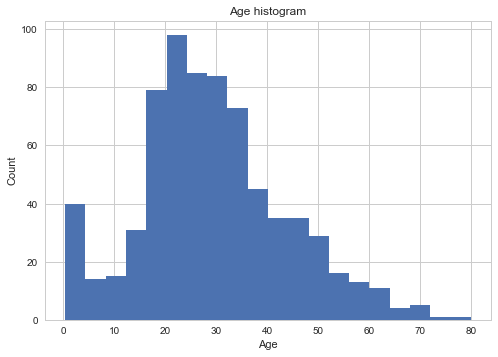

In [13]:
df.hist('Age',bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Age histogram")
plt.show()

In our EDA, we determined that Age is a very important variable, so we have to make sure that we have identical mix of ages in test and training data. To achieve this, we will divide the age into 8 categories, and use age category to perform stratified samling for test/train split.

In [14]:
np.seterr(divide='ignore', invalid='ignore')

df['age_cat'] = np.ceil(df["Age"]/8)

df["age_cat"].where(df["age_cat"] < 8, 8.0,inplace=True)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5.0


Let us perform random split in data based on age category (new variable), used to stratify the split.

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
split =  StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
X = df.drop(['Survived'],axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=X['age_cat'])

Make sure that the age categories are identically distributed in both the test and training data:

In [17]:
print("Age distribution in Training data:") 
print(X_train['age_cat'].value_counts()/len(X_train))

print("Age distribution in Test data:") 
print(X_test['age_cat'].value_counts()/len(X_test))

Age distribution in Training data:
8.0    0.237360
3.0    0.199438
4.0    0.189607
5.0    0.132022
6.0    0.078652
1.0    0.060393
2.0    0.051966
7.0    0.050562
Name: age_cat, dtype: float64
Age distribution in Test data:
8.0    0.240223
3.0    0.195531
4.0    0.189944
5.0    0.134078
6.0    0.078212
1.0    0.061453
2.0    0.050279
7.0    0.050279
Name: age_cat, dtype: float64


We no more need age_cat variable, so let us drop that.

In [18]:
X_train=X_train.drop(['age_cat'],axis=1)
X_test=X_test.drop(['age_cat'],axis=1)

Display sample rows of X_train

In [19]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
866,867,2,"Duran y More, Miss. Asuncion",female,27.00,1,0,SC/PARIS 2149,13.8583,NaN,C
412,413,1,"Minahan, Miss. Daisy E",female,33.00,1,0,19928,90.0000,C78,Q
806,807,1,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S
484,485,1,"Bishop, Mr. Dickinson H",male,25.00,1,0,11967,91.0792,B49,C


### Building the pipelines

We will use the following transformations, and each of these possible combinations effect on algorithms performance is tested by using Cross Validation method:

* The _Cabin_ column has a lot of Null values. So we will test two possible combinations: 
  1. Drop the _Cabin_ column
  2. Replace the _Cabin_ column with another column *Cabin_Indicator*. This new column will have 1 whenever the _Cabin_ has a non-null value. If the _Cabin_ variable has null vaue, then the new column will have a 0


* The _Sex_ variable does not have any nullvalue, and we will use LabelBinarizer() to transform the values in _Sex_


* The Pclass has 3 values 3, 2, 1. We will treat these as character variables, and apply LabelBinarizer() on this column also


* The _Age_ column has null values. So we will try 3 combinations:
   1. Replace all null values with median
   2. Replace all null values with mean
   3. Replace all null values with most frequent value


* The _Embarked_ column has 0.22% of null values (or 2 rows. See below code block). We will test the following 2 options:
   1. Drop the null rows
   2. Treat the null value as a separate class called _Null_, and apply LabelBinarizer()  

Pipelines help us to evaluate all the above transformations using Cross Validation technique, and help us to maintain consistency in our hyper parameter tuning.

In [20]:
sum(df['Embarked'].isnull())

2

## Pipelines, transformations, and predictive model development

In [21]:
#################################
##Program Name: train_model.py ##
##Python version: 3.4          ##
##Author: Sekhar Mekala        ##
#################################

##Importing all the required packages:

import os
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelBinarizer, Imputer, MinMaxScaler
from sklearn.pipeline import FeatureUnion

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

from sklearn.externals import joblib

##############################################################
##Reading the file train.csv to a pandas data frame called df#
##############################################################
def read_file(file_name):
    try:
        df = pd.read_csv(file_name)
    except:
        print("EXCEPTION/ERROR in read_file() function. Terminating the program.")
        exit(10)        
    return df
        

def get_train_data(df):
    '''
    ########################
    ##Test Train split:   ##
    ########################
    Splitting the data into test (20%) and train(80%)
    The function will return a list of data frames (X_train,y_train), containing the source and target variables
    The function will save the test data as test_data.csv
    
    The file test_data.csv will be used by score_model.py    

    We will divide the Age variable into 8 ranges (Age category), so that we can stratify
    the test and train split based on the Age category.
    See the EDA document for the detailed analysis, for the reason behind this.
    '''
    
    #Create a new variable called 'age_cat'.
    #This variable will contain the age category, and will be used
    #to stratify the sampling, while performing test/train split
    #The goal is to have right mix of age data in both test and training data
    
    #Check if the input is a data frame. If not raise an exception and terminate the program.
    try:
        if not isinstance(df,pd.DataFrame):
           raise ValueError
    except:
        print("**EXCEPTION/ERROR**: get_train_data(). The input to this function MUST be a pandas data frame. Terminating the program.")
        exit(10)
    
    
    df['age_cat'] = np.ceil(df["Age"]/8)
    df["age_cat"].where(df["age_cat"] < 8, 8.0,inplace=True)



    ##We will use random seed of 42 (random_state=42) to reproduce the same results.
    ##We will get 4 data frames:
    ##X_train: This contains all the training data
    ##y_train: This contains the target class for the observations in X_train
    ##X_test: This contains all the test data
    ##y_test: This contains the target class for the observations in X_test
    split =  StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
    X = df.drop(['Survived'],axis=1)
    y = df['Survived']
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=X['age_cat'])

    ##Since age_cat is NOT needed anymore, we will drop it from all the X_train and X_test data frames:
    X_train=X_train.drop(['age_cat'],axis=1)
    X_test=X_test.drop(['age_cat'],axis=1)

    ##The X_test and y_test data frames will NOT be used in training.
    ##They will be used to evaluate our final model
    ##See program score_model.py
    ##Let us save the X_test and y_test data frames, since they will be used by 
    ##the program: score_model.py
    try:
        X_test["Survived"] = y_test
        X_test.to_csv("test_data.csv",index=False)
        #y_test.to_csv("test_data_output.csv",index=False)
        
    except:
        print("EXCEPTION/ERROR in get_train_data(). Error occurred while saving the test files.")

    print("Saved the test data to test_data_inputs.files and test_data_output.csv files")
    return (X_train,y_train)

#######################
##Building Pipelines: #
#######################

## We will use the following transformations. 
## Each these possible transformations might have different effect on Machine Learning algorithms performance.
## The below listed combinations are not exhaustive. The goal is to build a set of transformations,
## so that their effect can be tested using Cross Validation technique. In other words, we are creating our own 
## hyper parameters to tune the algorithms


## The Cabin column has a lot of Null values. So we will test two possible combinations: 
##  1. Drop the Cabin column
##  2. Replace the Cabin column with another column Cabin_Indicator. This new column will have 1 whenever 
##     the Cabin has a non-null value. If the Cabin variable has null vaue, then the new column will have a 0

## The Sex variable does not have any null value. We will use LabelBinarizer() to transform the values in Sex
## based on one-hot encoding method.


## The Pclass has 3 values 3, 2, 1. We will treat these as character variables 
## and apply LabelBinarizer() on this column also


##  The Age column has null values. So we will try the following 3 combinations:
##  1. Replace all null values with median
##  2. Replace all null values with mean
##  3. Replace all null values with most frequent value

## To all numeric columns, we have to two options to scale the data:
## Std scaler
## Min-Max scaler

## The _Embarked_ column has 0.22% of null values (or 2 rows. See EDA). We will test the following 2 options:
## 1. Treat the null value as a separate class called Embarked_Null, and apply LabelBinarizer().
##    Embarked_Null will have a 1, if the corresponding value in Embarked has a non-null value
##    else it will have a 0 value
   
##Pipelines helps us to evaluate the above transformations, and test, if those transformations help (or does not help) the models.
##We will use 5 fold Cross Validation technique to evaluate the model performance


## In the following code we inherit BaseEstimator and TransformerMixin classes
## into our customized classes (which will be used in building the pipelines later).
## BaseEstimator will give us fit() and transform() methods, while 
## TransformerMixi will give us fit_transform()

## We need some global variables, so that 
## we can collect the column names used in the transformations, 
## for each class

##Global variable for Cabin transformer
cabin_column_transformed = []   

##Global variable for other categorical variables, except Cabin categorical variable 
categorical_column_transformed = []        



## The DataFrameSelector will help us to select the desired columns of a data frame
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X, y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names]



##Cabin transformer: 
##Cabin is a categorical variable. But unlike other categorical variables, 
##we want to test the effect of the following:
##The Cabin column has many classes, and mostly Null values (77%). So is this variable really useful?
##We will test the models CV score by ignoring cabin column (or)
##We will create another column called Cabin_Indicator, which contains 1 
##if the corresponding value in Cabin is not null,
##else Cabin_Indicator will have 0.

class CabinTransformer(BaseEstimator, TransformerMixin):
    #The inclusion/exclusion of Cabin variable is controlled by strategy variable
    #Default strategy is 'drop'. Other possible value is 'binomial'
    
    def __init__(self, strategy='drop'): 
        self.strategy = strategy
    
    def fit(self, X, y=None):
        return self #Nothing else to do
    
    
    def transform(self, X, y=None):
        ##The transform function must return a numpy array or a data frame.
        ##But how can we get the column names of the transformed data?
        ##We will use global variable. 
        ##For this class we will use cabin_column_transformed
        global cabin_column_transformed 
        
        ##Reset the global variable
        cabin_column_transformed = []
        
        ##If strategy is 'drop', then delete the Cabin column
        if self.strategy == 'drop':
            return X.drop(['Cabin'],axis=1)

        ##If strategy is 'binomial', then create Cabin_Indicator            
        if self.strategy == 'binomial':
            X.loc[:,('Cabin_Indicator')] = X['Cabin'].apply(lambda x: 1 if not pd.isnull(x) else 0)
            cabin_column_transformed = ['Cabin_Indicator']
            return X.drop(['Cabin'],axis=1)

            
            
            
##The following transformation will be applied to all categorical variables, except Cabin, 
##since Cabin is handled by CabinTransformer
##CatNullTransformer will replace all the NaN values in categorical columns with value.
##The value is supplied as input to the class constructor. 
class CatNullTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,value): 
        self.value = value
    
    def fit(self, X, y=None):
        return self #Nothing else to do
    
    def transform(self, X, y=None):
            columns = X.columns
            for i in columns:
                X.loc[:,(i)] = X[i].fillna(self.value)
            return X


#The following transformer will be  applied to all categorical variables except Cabin
#The below code might look complex, but I had to write this logic due to the following drawbacks
#of the existing encoders:
##1. We can use get_dummies of pandas. But without modifying or creating a custom transformer, it is not possible to use it in pipeline.
##   For example, if we have ['r','g'] in column color, then get_dummies() will give us following:
##   color_r color_g
##   ------- -------
##   1       0
##   0       1
##   But if our test data has an extra class 'b' or does not have 'r' or 'g', then we will bet different dummy variables.
##   Another drawback is, color_r and color_g are correlated. Only one variable is sufficient to represent both values.
##   If we have n classes, then we need n-1 dummy variables to represent all the classes. 

##2. We can use LabelBinarizer(). But it has the following drabacks:
##2a. LabelBinarizer cannot take more than one categoricalcolumn as input.
##2b. LabelBinarizer behaves differently based on the number of unique classes in the input categorical variable.
##    For example, if we fit LabelBinarizer on a categorical variable with values ['red','blue'], then it will create
##    a model of LabelBinarizer. Now if we aply transform() on ['red','blue'], then we will get a one column variable
##    [1, 0]. However if we try to transform ['red','blue','green'], using the same LabelBinarizer model fit on ['red','blue'], then
##    we will get a matrix (like the following):
##    [[0,1],
##     [1,0],
##     [0,0]]
##    Ideally we should get the matrix shown below:
##    [1, 0, 0]
##
##2c. Another drawback of LabelBinarizer is, if we have only 2 classes in a variable only one dummy variable is created to 
##    represent the data. But if we have more than 2 classes, then the number of dummy variables is equal to the number of
##    classes. Ideally, if we have n classes, we should get n-1 dummy variables only.

##The following transformer must be applied on pandas data frame only. This transformer can process multiple categorical
##columns and also creates dummy variables based on the principle: n-1 dummy variables per categorical variable, if the 
##categorical variable has n classes. NOTE we will use a global variable categorical_column_transformed to collect the 
##dummy variable names. 
class CatMultiLabelTransformer(BaseEstimator, TransformerMixin):
    def __init__(self): 
        pass ##Nothing to do
    
    def fit(self, X, y=None):
        
        ##Check if input object is a pandas df, else raise exception
        try:
            if not isinstance(X,pd.DataFrame):
               raise ValueError
        except:
            print("**EXCEPTION/ERROR**: CatMultiLabelTransformer.fit() can accept only Pandas dataframe")
            exit(10)
        
        ##Create an empty list, which will be updated with LabelBinarizer for each column        
        self.binarizers=[]
        ##Declare the categorical_column_transformed as global variable, so that we can update it
        ##with column names used in the final transformation
        
        global categorical_column_transformed 
        ##Reset the global variable to empty list, to flushout any previous data.
        categorical_column_transformed = []
        
        ##Fit a LabelBinarizer for each column and save the models in a class variable
        for i in X.columns:
            lb = LabelBinarizer()
            self.binarizers.append(lb.fit(X[i]))
            
            ##Prefix the dummy variables (class names)  with the variable name (or column name), 
            ##so that we can distinguish the data
            ##If a class called 'male' is present in two variables, then the column prefix will help
            ##us to distinguish between the variables data in the dummy variables
            categorical_column_transformed.append([str(i) + "_" + str(j) for j in list(lb.classes_)])
            
        ##Declare a list object to collect the variable names after applying LabelBinarizer on each column
        self.X_fit_classes = []    
        
        for i,j in enumerate(categorical_column_transformed):
              ##If we have only two classes like 'male' and 'female', then we should consider 
              ##only one of the classes, since LabelBinarizer will encode the 2 values using one dummy variable only        
              if len(j) == 2:
                 self.X_fit_classes.append(j[1])
              else:
              ##If we have more than two classes like 'r', 'g' 'b' 
              ## LabelBinarizer will encode the data using 3 dummy variables, and hence we have to consider first 2 variables only
              ## In general, if we have n (where n>2) dummy variables given by LabelBinarizer, then we need to consider only n-1 variables
                 self.X_fit_classes = self.X_fit_classes+j[0:len(j)-1]
        ##Update the global variable                 
        categorical_column_transformed = self.X_fit_classes         
                 
        return self
    
    def transform(self, X, y=None):
            ##Check if input object is a pandas df, else raise exception
            try:
               if not isinstance(X,pd.DataFrame):
                  raise ValueError
            except:
               print("**EXCEPTION/ERROR**: CatMultiLabelTransformer.transform() can accept only Pandas dataframe")
               exit(10)

            ##Declare an empty numpy matrix,
            ##This will be a recurrent matrix to collect all the variables transformations
            ##The inital data used to initialize the matrix will be discarded later
            X_transform = np.empty([len(X),1])
            
            ##We will again collect the class names, similar to the way we collected in the fit(), using X_fit_classels list.
            ##At the end we will compare the X_fit_classes and X_transform_classes, and raise an exception if they have different values
            X_transform_classes = []

            #Process all the columns, one after the other             
            for i,j in enumerate(X.columns):
                ##Collect the transformed data into a temp variable
                temp_transformed_data = self.binarizers[i].transform(X[j])
                ##Get the shape of the transformed data
                temp_transformed_data_cols = temp_transformed_data.shape[1]
                
                #If number of classes is more than 2,
                #then collect all the class names, since
                #label binarizer will create n dummy variables, if we have n classes, when n > 2
                #We will modify the class name by prefixing the class with column name
                #Here also we will prefix the class name with the column name
                if temp_transformed_data_cols > 2:
                    X_transform_classes.append([j +"_"+ str(c) for c in list(self.binarizers[i].classes_)])
                    ##Update the recurrent matrix with new data                    
                    X_transform=np.c_[X_transform,temp_transformed_data]

                #If the number of classes is 2, then label binarizer will create one variable only,
                #although the lb.classes_ will have 2 values. lb.classes[1] will be the corresponding
                #label where the binarized column will have 1.
                #Here also we will prefix the class name with the column name
                #print("temp_transformed_data_col = {}".format(temp_transformed_data_cols))
                #print(temp_transformed_data)
                if temp_transformed_data_cols == 2:
                    X_transform_classes.append([j + "_" + str(list(self.binarizers[i].classes_)[1])])
                    X_transform=np.c_[X_transform,temp_transformed_data[:,1]]
                 
        
                #If the number of classes is 1 or 2, then label binarizer will create one variable only
                #Here also we will prefix the class name with the column name
                if temp_transformed_data_cols == 1:
                  ##Check if only one dummy variable is created due to the presence of only one class
                  if len(self.binarizers[i].classes_) == 1:
                      X_transform_classes.append([j + "_" + str(list(self.binarizers[i].classes_)[0])])
                  ##Check if only one dummy variable is created due to the presence of only two class    
                  if len(self.binarizers[i].classes_) == 2:
                      X_transform_classes.append([j + "_" + str(list(self.binarizers[i].classes_)[1])])
                  X_transform=np.c_[X_transform,temp_transformed_data]
            
            ##Flat the list of lists to a singe list
            X_transform_classes=[item for sublist in X_transform_classes for item in sublist]   
            
            #We need to remove the 0th column of recurrent matrix X_transform, since we created a dummy column initially
            #since we need to initialize the recurrent array with some initial value
            X_transform = np.delete(X_transform,0,axis=1)
            
            #Create a data frame with the dummy variable names.
            X_transform = pd.DataFrame(X_transform,columns = X_transform_classes)
            
            #But we need to drop the extra dummy variables (if we have n classes, we need only n-1 dummy variables)
            X_transform = X_transform[self.X_fit_classes]
            return X_transform

##Testing the above transformer. Call the below function to test:
def test_CatMultiLabelTransformer(input=True):
  if input:
    ct = CatMultiLabelTransformer()
    demo_df_1=pd.DataFrame(['red','green'],columns=['Color'])
    ct.fit(demo_df_1)
    print("\n\nFitted data frame or training data:\n{}".format(demo_df_1))
    print("\n\nData to be transformed is given below:.\nObserve that we have new class 'blue'")
    print("'blue' was not existing the training data.\n\n")
    demo_df_2 = pd.DataFrame(['red','green','blue'],columns=['Color'])
    print(demo_df_2)
    print("\nAfter transforming/encoding...\n")
    print(pd.DataFrame(ct.transform(demo_df_2),columns=categorical_column_transformed))
    print("But if we have 3 classes in the training data:")
    print("Another training data set:")
    demo_df_1=pd.DataFrame(['S','M','XL'],columns=['Sizes'])
    ct.fit(demo_df_1)
    print("\n\nFitted data frame or training data:\n{}".format(demo_df_1))
    print("Transformed data:")
    print(pd.DataFrame(ct.transform(demo_df_1),columns=categorical_column_transformed))
  else:
    pass  

#To test CatMultiLabelTransformer, call test_CatMultiLabelTransformer(input=True)      
test_CatMultiLabelTransformer(input=False)


##The ScaleData will help us to evaluate which scale method performs better
##We will use std scaler by default, but another option is min-max scaler.
##The constructor parm std_scaler can be used to control this option while 
##testing the models using CV method.            
class ScaleData(BaseEstimator, TransformerMixin):
    def __init__(self,std_scaler=True):
        self.std_scaler = std_scaler
    def fit(self,X, y=None):
        if self.std_scaler == True:
           self.scaler = StandardScaler()
        else:
           self.scaler = MinMaxScaler()
        return self.scaler.fit(X)

    def transform(self,X):
        return self.scaler.transform(X)
        
#Numeric columns. We will ignore passenger ID and Ticket            
numeric_columns = ['Age','SibSp','Parch','Fare']        

#Categorical columns except the Cabin column        
categorical_columns = ['Pclass','Sex','Embarked']

#Define a pipeline for numeric variables transformation
#Age is the only column with Null values, but will still impute for all
#Numerical variables, since we do not know if the input numerical data contains 
#unavailable data after we deploy the model in Production


#Pipeline to handle numeric columns
#We are using the default impute strategy as 'median', but we will test 'average' and 'most frequently' also
numeric_pipeline = Pipeline([('selector',DataFrameSelector(numeric_columns)),
                            ('imputer',Imputer(strategy='median')),
                            ('scaledata',ScaleData(std_scaler=False))])

#Pipeline to handle Cabin column                             
cabin_pipeline = Pipeline([('selector',DataFrameSelector(['Cabin'])),
                           ('CabinTransformer',CabinTransformer(strategy='binomial'))
                          ])

#Pipeline to handle categorical columns (except cabin column)
categorical_pipeline = Pipeline([('selector',DataFrameSelector(categorical_columns)),
                                 ('fillnull',CatNullTransformer(value='Null')),
                                 ('CatMultiLabelTransformer',CatMultiLabelTransformer())
                                ])

#Combine all the transformations                                
full_transform_pipeline = FeatureUnion(transformer_list=[
           ("numeric_pipeline",numeric_pipeline),
           ("cabin_pipeline",cabin_pipeline),
           ("categorical_pipeline",categorical_pipeline)
           ])            

def main():
        ##In this block we will actually get the train data, perform transformations and
        ##fit the best model based on accuracy of 5 fold CV test.
        
        ##Read the file
        df = read_file('./train.csv')
        
        ##Get the training data
        X_train,y_train = get_train_data(df)
        
        ##Display sample rows of training data after the final transformation
        training_data_transformed = full_transform_pipeline.fit_transform(X_train)
        training_variables = numeric_columns + cabin_column_transformed + categorical_column_transformed
        print("\n\nTransformed data (initial 5 rows only), which is ready for training is displayed below:\n")
        print(pd.DataFrame(training_data_transformed,columns = training_variables).head(5))

        ##Fitting a random forest model
        rf_prepare_and_train = Pipeline([('full_transform_pipeline',full_transform_pipeline),
                                   ('rf',RandomForestClassifier())
                                  ])

        ##Define a dictionary containing the list of hyper parms to be tested                          
        ##For random forest, we will test the CV score using 5,10,50,100 trees
        parm_grid = [{'full_transform_pipeline__cabin_pipeline__CabinTransformer__strategy': ['drop','binomial'], 
                      'full_transform_pipeline__numeric_pipeline__imputer__strategy':['mean','median','most_frequent'],
                      'full_transform_pipeline__numeric_pipeline__scaledata__std_scaler':[True,False],
                      'rf__n_estimators':[10,50,100]}]

        ##Perform grid search with a CV of 5
        ##Change verbose=2, to display detailed report
        grid_search = GridSearchCV(rf_prepare_and_train,parm_grid,cv=5,scoring='accuracy',verbose=1)
        grid_search.fit(X_train,y_train)              

        print("Best hyper parameters using Random Forests:")
        print(grid_search.best_params_)

        print("Best 5 fold CV score (accuracy):")
        print(grid_search.best_score_)

        final_model = grid_search.best_estimator_
        print(final_model)
        final_model.fit(X_train,y_train)
        print("Saving the best model..")
        joblib.dump(final_model,"rf_best_model.pkl")
        print("Saving Complete!")


##Boiler plate
if __name__ == '__main__':
    main()

Saved the test data to test_data_inputs.files and test_data_output.csv files


Transformed data (initial 5 rows only), which is ready for training is displayed below:

        Age  SibSp     Parch      Fare  Cabin_Indicator  Pclass_1  Pclass_2  \
0  0.000000  0.000  0.166667  0.016623              0.0       0.0       0.0   
1  0.334004  0.125  0.000000  0.027050              0.0       0.0       1.0   
2  0.409399  0.125  0.000000  0.175668              1.0       1.0       0.0   
3  0.484795  0.000  0.000000  0.000000              1.0       1.0       0.0   
4  0.308872  0.125  0.000000  0.177775              1.0       1.0       0.0   

   Sex_male  Embarked_C  Embarked_Q  
0       1.0         1.0         0.0  
1       0.0         1.0         0.0  
2       0.0         0.0         1.0  
3       1.0         0.0         0.0  
4       1.0         1.0         0.0  
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.1min finished


Best hyper parameters using Random Forests:
{'rf__n_estimators': 10, 'full_transform_pipeline__numeric_pipeline__scaledata__std_scaler': True, 'full_transform_pipeline__numeric_pipeline__imputer__strategy': 'mean', 'full_transform_pipeline__cabin_pipeline__CabinTransformer__strategy': 'drop'}
Best 5 fold CV score (accuracy):
0.790730337079
Pipeline(steps=[('full_transform_pipeline', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric_pipeline', Pipeline(steps=[('selector', DataFrameSelector(attribute_names=['Age', 'SibSp', 'Parch', 'Fare'])), ('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('sca...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])
Saving the best model..
Saving Complete!


## Model evaluation on test data


Scores of Random Forest:
Test f1 score:0.7500000000000001
Test precision score:0.7758620689655172
Test recall score:0.7258064516129032
Test accuracy score:0.8324022346368715

 Saving the results to accuracy_report.txt...

Accuracy report saved!!
Displaying the confusion matrix...
Close the figure to proceed further ...


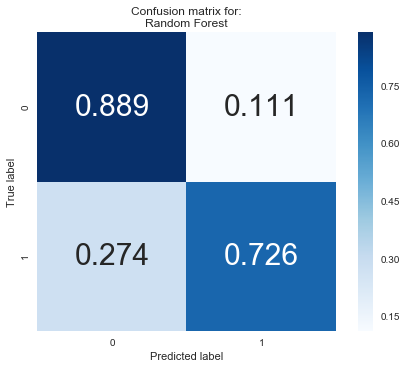

Confusion matrix is saved as confusion_matrix.png!!


In [22]:
##score_model.py
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_conf_matrix(y_test,y_test_predict,model):

        ##Generate the confusion matrix
        cm = confusion_matrix(y_test, y_test_predict)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        # view with a heatmap
        sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
                    cmap='Blues', square=True, fmt='.3f')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.title('Confusion matrix for:\n{}'.format(model))
        print("Displaying the confusion matrix...")
        print("Close the figure to proceed further ...")
        plt.show()
        plt.savefig('confusion_matrix.png')
        print("Confusion matrix is saved as confusion_matrix.png!!")

def print_and_save_report(y_test,y_test_predict,model):
       print("\nScores of "+model+":")        
       print("Test f1 score:{}".format(f1_score(y_test,y_test_predict)))
       print("Test precision score:{}".format(precision_score(y_test,y_test_predict)))
       print("Test recall score:{}".format(recall_score(y_test,y_test_predict)))
       print("Test accuracy score:{}".format(accuracy_score(y_test,y_test_predict)))
       print("\n Saving the results to accuracy_report.txt...")
       with open('accuracy_report.txt','w') as f:
             f.write("Test f1 score:{}".format(f1_score(y_test,y_test_predict)))
             f.write("\nTest precision score:{}".format(precision_score(y_test,y_test_predict)))
             f.write("\nTest recall score:{}".format(recall_score(y_test,y_test_predict)))
             f.write("\nTest accuracy score:{}".format(accuracy_score(y_test,y_test_predict)))
       print("\nAccuracy report saved!!")     


def main():
        ##Read the saved model
        rf_model = joblib.load("rf_best_model.pkl")
        ##Read the file (using the function in the package train_model)
        X_test = read_file('./test_data.csv')
        y_test = X_test['Survived']
        X_test = X_test.drop(['Survived'],axis=1)

        y_test_predict = rf_model.predict(X_test)
        print_and_save_report(y_test,y_test_predict,'Random Forest')
        plot_conf_matrix(y_test,y_test_predict,'Random Forest')
        
##Boiler plate syntax        
if __name__ == '__main__':
    main()